In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
from google.colab import files
uploaded = files.upload()

Saving icecream.csv to icecream.csv


In [4]:
df = pd.read_csv("icecream.csv", header=None)

In [5]:
df

,0,1,2,3,4,5,6,7,8,9
0,1,0,1,1,0,1,0,1,1,1
1,1,1,0,1,0,1,1,1,0,0
2,0,0,1,1,0,0,1,0,0,0
3,1,0,0,1,0,0,1,1,0,1
4,1,1,0,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
115,1,1,1,1,1,0,0,0,0,1
116,0,1,1,0,1,0,0,0,1,0
117,0,1,1,1,1,0,0,0,1,1
118,0,0,1,1,1,1,0,0,1,0


## Part 1


### Preparing the input data

In [101]:
V0 = df.to_numpy()
V0 = V0*2 - 1
V0.shape

(120, 10)

### RBM train function

This function takes the input data and tries to reconstruct it. It also plots the MAE vs epoch lenght

In [102]:
def train_weights_RBM(input, hidden_size, epoch_len, eta):
  V0 = input
  w = np.random.uniform(low = 0, high=0.1, size=(V0.shape[1], hidden_size))
  error_arr = []

  for epoch in range(epoch_len):
    H0 = np.array([]).reshape(0, hidden_size)
    V1 = np.array([]).reshape(0, V0.shape[1])
    H1 = np.array([]).reshape(0, hidden_size)
    for v0 in V0:
      prod = np.matmul(w.T, v0)
      h0 = np.sign((1 / (1+ np.exp(-1 * prod))) - np.random.uniform(size = prod.shape))
      H0 = np.vstack((H0, h0))
      prod = np.matmul(w, h0)
      v1 = np.sign((1 / (1+ np.exp(-1 * prod))) - np.random.uniform(size = prod.shape))
      V1 = np.vstack((V1, v1))
      prod = np.matmul(w.T, v1)
      h1 = np.sign((1 / (1+ np.exp(-1 * prod))) - np.random.uniform(size = prod.shape))
      H1 = np.vstack((H1, h1))
    V0H0 = V0.T @ H0 / V0.shape[0]
    V1H1 = V1.T @ H1 / V1.shape[0]
    w = w + eta * (V0H0 - V1H1)
    error = np.average(np.sum(np.abs(V0-V1), axis = 1))
    error_arr.append(error)

  plt.plot(error_arr)
  plt.show()
  return w

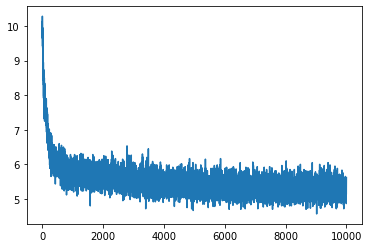

array([[ 3.75840986,  0.57672639,  2.1971951 ,  2.04009391],
       [-0.21455366,  0.51576165,  0.50914556,  0.35982805],
       [ 1.99923925, -0.31457506, -4.84289316, -0.36603127],
       [ 1.2342366 ,  0.86843833,  0.8927611 , -1.34692203],
       [-0.02015284,  0.20680179, -1.01680144, -0.45298002],
       [ 0.33104584,  1.01688803,  0.34398506, -1.41775279],
       [ 0.87398657, -0.00895895,  0.28546718, -0.22108828],
       [ 1.09558188,  0.66908623,  0.45373934, -0.49233763],
       [-1.74992864,  4.13588991, -0.87428235,  1.34511576],
       [-0.80459214, -0.66286357, -0.79644609,  1.51001008]])

In [103]:
train_weights_RBM(V0, 4, 10000, 0.1)

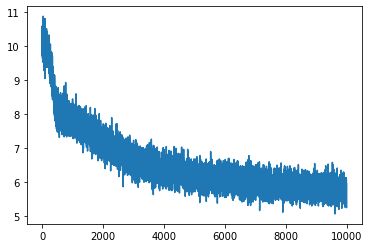

array([[ 1.84472544, -0.89327713,  0.23423242, -0.93964976],
       [-0.40494525, -0.45586061,  1.17409853, -0.86371623],
       [ 0.09208822,  2.24563432, -0.51271435,  0.34852725],
       [ 0.82004432, -0.66161984,  0.72799165,  1.07696345],
       [ 0.07510507,  1.35672893,  0.11540465,  0.53367735],
       [-0.10112011, -0.19786091,  0.8598533 ,  1.31697586],
       [ 0.97430898, -0.35317786, -0.42747122,  0.4449765 ],
       [ 1.27173903, -0.11570446,  0.4379997 ,  0.49591269],
       [-0.46310891,  0.60619114,  1.6916487 , -0.50051177],
       [-0.2178783 ,  0.73571642, -0.82457332, -1.38533142]])

In [105]:
train_weights_RBM(V0, 4, 10000, 0.01)

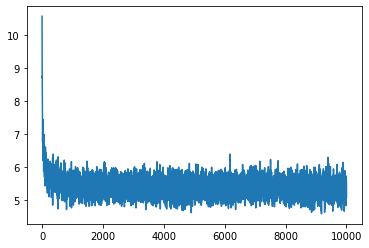

array([[ 1.41454314,  0.42019972, -0.65872996,  1.53064291],
       [-0.09712007, -0.94314474,  0.11499782, -0.53734251],
       [-6.39430357,  6.91015424,  1.20013687, -6.79621357],
       [ 0.83769497,  0.23776027,  1.11871099,  0.82265394],
       [-0.11952637,  0.36523592,  0.37316975, -0.64825462],
       [ 0.79901345,  0.14457082,  1.00493474, -0.39662221],
       [ 0.96770209,  0.93606152,  0.04188157,  1.20077775],
       [ 3.11395946,  2.41264186,  0.59741977,  0.91243983],
       [ 5.07085446, -2.67746519,  0.17233565, -7.78675704],
       [ 0.07954396,  1.19181172, -2.89784605, -0.99975504]])

In [106]:
train_weights_RBM(V0, 4, 10000, 0.5)

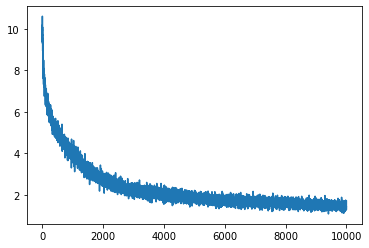

array([[ 1.26532105, -4.94680073, -1.2729457 ,  3.23282267,  4.0615354 ,
        -4.23387978,  0.59744883, -4.9188305 ,  2.35091593,  2.13978295],
       [-2.81456367,  2.53142561,  2.53107114,  0.85820823, -2.47795286,
        -0.24751671, -0.88951075, -2.07244556,  2.32637545,  4.67088483],
       [-2.90381718,  2.18087928, -3.98099488, -4.02387016,  0.83008259,
        -0.85456795, -0.52436666, -0.33886414,  0.67985389, -0.72419584],
       [ 2.12141178,  4.61258354,  0.99343747,  1.77666972,  3.40643749,
        -1.79070105,  4.0804771 ,  2.40324019,  1.37163991,  1.28347987],
       [ 0.36639388,  0.69985106, -2.95643937,  1.027572  , -2.11892782,
        -0.55810519, -0.3755027 ,  2.07496668,  1.23443162,  0.5854846 ],
       [ 2.89528365, -2.40720175, -0.43548555, -3.56783025,  0.23221897,
        -3.05774623,  0.93943694,  2.4746203 , -3.3606504 ,  3.5458184 ],
       [ 2.28438749,  3.08044313, -0.2178821 ,  2.21983263,  2.6433345 ,
        -3.54968533, -4.83728415,  0.83136976

In [107]:
train_weights_RBM(V0, 10, 10000, 0.1)

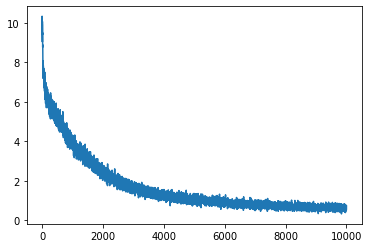

array([[-3.01402473,  3.88389876, -2.97877988,  2.14549833,  2.18062708,
         1.63155536, -1.69958014,  3.38743423, -2.57389875,  3.41618041,
        -3.16382572, -2.45667269,  2.35332065,  0.56909989, -1.56824801],
       [-1.68511182, -0.59568905, -3.47228035, -0.83307493,  2.30190821,
         0.65026823,  2.70959558, -0.81342836,  2.52746053, -1.48320885,
        -2.12317791,  3.90313506,  1.70957797, -0.12819029, -0.69445699],
       [ 0.122191  , -1.39682264, -0.37912471, -4.31120936, -1.48188082,
        -4.18000683, -2.53064673, -0.38898384,  2.6121457 ,  3.16828583,
        -3.92956122, -0.15812305, -3.2634954 , -2.78131736, -1.4176702 ],
       [ 1.39018117,  2.0687037 ,  0.77327609, -0.16611951,  4.0360513 ,
         2.0281083 , -1.58613726, -2.68409186,  4.86580586,  2.07214733,
         1.3866253 , -1.88978963,  1.09993054,  4.20571617, -1.22613785],
       [ 2.4812062 , -0.2088896 ,  2.30660323,  1.59735897,  1.10926697,
         0.02232425, -2.92479521,  1.69613371, 

In [118]:
train_weights_RBM(V0, 15, 10000, 0.1)

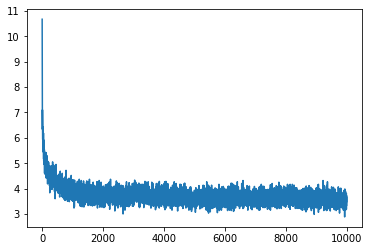

array([[-3.38334812e+00,  3.16374558e+00, -3.74436811e+00,
         6.67659326e+00,  1.32709149e+01,  2.05343144e+00],
       [-4.52356585e-01,  1.37085080e+00,  2.10778152e-03,
         7.66490877e-01, -3.37407222e-01, -5.09685803e-01],
       [ 2.94387681e-01, -7.67460441e-01,  1.60987676e+00,
         3.03281081e-01, -1.52119997e-01, -5.51360913e-01],
       [-8.44582160e-01,  1.23375827e+00, -9.47817977e-01,
        -1.77968403e+00,  8.35084407e-01,  2.49696046e-01],
       [-1.83527522e+00,  1.55883807e-01,  8.34470985e+00,
        -5.69815993e+00,  4.40767760e+00,  4.42685293e-01],
       [ 1.72091322e+01,  1.72134944e+00, -3.09264043e+00,
        -6.44668255e+00,  5.15838162e+00,  1.85134069e+00],
       [-6.50508785e-01, -7.34848986e-01, -8.74756749e-01,
        -1.39795388e+00,  1.33007769e+00,  1.72620464e+00],
       [-2.32757431e+00,  5.56690937e-01, -7.32353046e-01,
        -3.53104936e+00,  2.55797728e+00,  2.78678742e+00],
       [ 2.10798738e+00,  1.06579855e+01,  4.259

In [108]:
train_weights_RBM(V0, 6, 10000, 1)

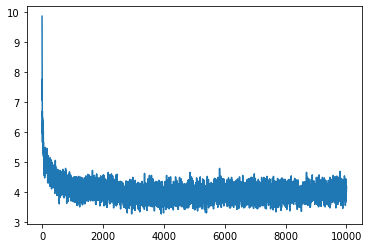

array([[ 0.52142105,  4.79961518,  1.86422317,  1.18551478,  1.08670303,
        -4.99875378],
       [ 1.0231945 , -0.34109858, -1.18176829,  0.25183176,  2.77661935,
        -0.61706694],
       [-0.29200369, -0.21992176, -0.14162823, -1.54881657, -0.8563008 ,
         0.49726432],
       [ 0.55353572,  0.93758599,  1.33113327,  1.24006742,  0.3159391 ,
         0.85333943],
       [ 4.86900835,  2.90137006,  6.82960742, -6.3506669 ,  0.42993507,
         3.44850976],
       [-8.22842449, -3.28437229, 10.63792855,  0.5899316 ,  1.49520559,
        -1.06911584],
       [ 1.64635155,  0.84066604,  1.717958  ,  1.04623441, -0.52112977,
         0.54695801],
       [ 1.66535945,  0.8121654 ,  1.90596769,  1.01623687,  0.06325402,
         0.23582799],
       [ 0.24417334, -1.18580459,  0.18592404, -0.47369103,  1.28227055,
        -0.21144463],
       [ 2.94443786, -4.8495972 ,  0.03057782, -2.85574654, -1.99783339,
        -5.11811345]])

In [109]:
train_weights_RBM(V0, 6, 10000, 1)

### Adding bias to the input layer

In [111]:
def train_weights_RBM_bias(input, hidden_size, epoch_len, eta):
  V0 = input
  w = np.random.uniform(low = -0.1, high=0.1, size=(11, hidden_size))
  error_arr = []
  V0 = np.hstack((np.ones((120,1)), V0))
  for epoch in range(epoch_len):
    H0 = np.array([]).reshape(0, hidden_size)
    V1 = np.array([]).reshape(0, 11)
    H1 = np.array([]).reshape(0, hidden_size) 
    for v0 in V0:
      # print(v0)
      prod = np.matmul(w.T, v0)
      h0 = np.sign((1 / (1+ np.exp(-1 * prod))) - np.random.uniform(size = prod.shape))
      # print(h0)
      H0 = np.vstack((H0, h0))
      # print(h0.shape)
      prod = np.matmul(w, h0)
      v1 = np.sign((1 / (1+ np.exp(-1 * prod))) - np.random.uniform(size = prod.shape))
      V1 = np.vstack((V1, v1))
      # print(v1.shape)
      prod = np.matmul(w.T, v1)
      h1 = np.sign((1 / (1+ np.exp(-1 * prod))) - np.random.uniform(size = prod.shape))
      H1 = np.vstack((H1, h1))
      # print(h1.shape)
    V0H0 = V0.T @ H0 / V0.shape[0]
    V1H1 = V1.T @ H1 / V1.shape[0]
    w = w + eta * (V0H0 - V1H1)
    error = np.average(np.sum(np.abs(V0-V1), axis = 1))
    error_arr.append(error)

  plt.plot(error_arr)

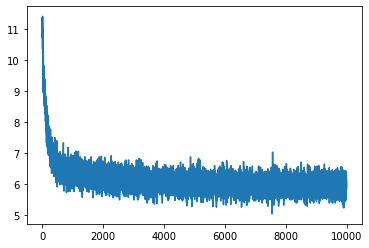

In [112]:
train_weights_RBM_bias(V0, 4, 10000, 0.1)

### Increasing the number of iterations in contrastive divergence estimation

In [110]:
def train_weights_RBM_div(input, hidden_size, epoch_len, eta):

  V0 = input
  w = np.random.uniform(low = -0.1, high=0.1, size=(10, hidden_size))
  error_arr = []
  for epoch in range(epoch_len):
    H0 = np.array([]).reshape(0, hidden_size)
    V1 = np.array([]).reshape(0, 10)
    H1 = np.array([]).reshape(0, hidden_size)
    V2 = np.array([]).reshape(0, 10)
    H2 = np.array([]).reshape(0, hidden_size)
    V3 = np.array([]).reshape(0, 10)
    H3 = np.array([]).reshape(0, hidden_size)  
    for v0 in V0:
      prod = np.matmul(w.T, v0)
      h0 = np.sign((1 / (1+ np.exp(-1 * prod))) - np.random.uniform(size = prod.shape))
      H0 = np.vstack((H0, h0))
      prod = np.matmul(w, h0)
      v1 = np.sign((1 / (1+ np.exp(-1 * prod))) - np.random.uniform(size = prod.shape))
      V1 = np.vstack((V1, v1))
      prod = np.matmul(w.T, v1)
      h1 = np.sign((1 / (1+ np.exp(-1 * prod))) - np.random.uniform(size = prod.shape))
      H1 = np.vstack((H1, h1))
      prod = np.matmul(w, h1)
      v2 = np.sign((1 / (1+ np.exp(-1 * prod))) - np.random.uniform(size = prod.shape))
      V2 = np.vstack((V2, v2))
      prod = np.matmul(w.T, v2)
      h2 = np.sign((1 / (1+ np.exp(-1 * prod))) - np.random.uniform(size = prod.shape))
      H2 = np.vstack((H2, h2))   

    V0H0 = V0.T @ H0 / V0.shape[0]
    V2H2 = V2.T @ H2 / V2.shape[0]
    w = w + eta * (V0H0 - V2H2)
    error = np.average(np.sum(np.abs(V0-V2), axis = 1))
    error_arr.append(error)

  plt.plot(error_arr)

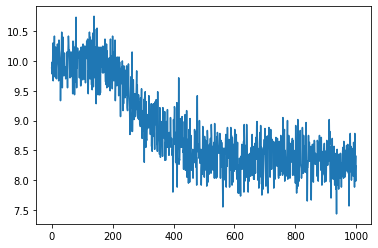

In [113]:
train_weights_RBM_div(V0, 10, 1000, 0.01)

##Bonus 1

### Train Test Split

In [166]:
V0 = df.to_numpy()
V0 = V0*2 - 1
np.random.shuffle(V0)
training, test = V0[:108,:], V0[108:,:]


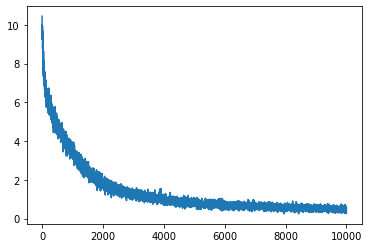

In [140]:
w = train_weights_RBM(training, 15, 10000, 0.1)

### Recommendation Ability Calculation

In [147]:
def rbm_predict(test):

  idx_arr = []
  error_arr = np.array([]).reshape(0, V0.shape[1])
  count = 0
  count1 = 0
  for i in range(100):
    for v0 in test:
          np.random.shuffle(v0)
          sample = v0.tolist()
          idx_1 = sample.index(1)
          idx_minus_1 = sample.index(-1)
          sample[idx_1] = 0
          sample[idx_minus_1] = 0
          idx_arr.append([idx_1, idx_minus_1])
          prod = np.matmul(w.T, sample)
          h0 = np.sign((1 / (1+ np.exp(-1 * prod))) - np.random.uniform(size = prod.shape))
          prod = np.matmul(w, h0)
          v1 = np.sign((1 / (1+ np.exp(-1 * prod))) - np.random.uniform(size = prod.shape))
          prob_1 = 1 / (1 + np.exp(-1 *prod[idx_1]))
          prob_minus1 = 1 / (1 + np.exp(-1 *prod[idx_minus_1]))
          if prob_1 > prob_minus1:
            count1 = count1 +1
          error_arr = np.vstack((error_arr, np.abs(v1 - v0)))
          if v1[idx_1] == v0[idx_1]:
            count = count + 1
  print("Number of times probabilty of 1 was greater than probability of -1 = {}".format(count1/len(error_arr)))
  print("Number of times the changed 0 was correctly detected as 1 and coming fron 1 = {}".format(count/len(error_arr)))    
  print("Overall Accuracy of the system = {}".format(1 - sum(sum(error_arr>0)) / (len(error_arr)*10)))

In [156]:
rbm_predict(test)

Number of times probabilty of 1 was greater than probability of -1 = 0.4875
Number of times the changed 0 was correctly detected as 1 and coming fron 1 = 0.5066666666666667
Overall Accuracy of the system = 0.8498333333333333


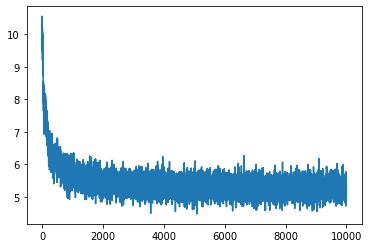

In [167]:
w = train_weights_RBM(training, 4, 10000, 0.1)

In [168]:
rbm_predict(test)

Number of times probabilty of 1 was greater than probability of -1 = 0.5091666666666667
Number of times the changed 0 was correctly detected as 1 and coming fron 1 = 0.49583333333333335
Overall Accuracy of the system = 0.621


## Bonus 3

In [128]:
from google.colab import files
uploaded = files.upload()

Saving jester-simple.csv to jester-simple.csv


In [158]:
V0 = np.loadtxt("jester-simple.csv", delimiter=',')
V0.shape

(24983, 100)

In [159]:
training, test = V0[:22485,:], V0[22485:,:]

In [161]:
training[0]

array([-1.,  1., -1., -1., -1., -1., -1.,  1., -1., -1., -1., -1., -1.,
        1., -1., -1., -1., -1., -1., -1., -1.,  0., -1., -1., -1.,  0.,
        1.,  0.,  1., -1.,  0., -1., -1.,  1.,  1.,  1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1.,  1.,  0.,  1.,  1., -1., -1.,
        1.,  1., -1.,  0., -1., -1.,  0., -1.,  1.,  1., -1., -1.,  0.,
        0., -1.,  1.,  1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,
        0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.])

In [164]:
def rbm_predict_0(test):
    for v0 in test:
          prod = np.matmul(w.T, v0)
          h0 = np.sign((1 / (1+ np.exp(-1 * prod))) - np.random.uniform(size = prod.shape))
          prod = np.matmul(w, h0)
          v1 = np.sign((1 / (1+ np.exp(-1 * prod))) - np.random.uniform(size = prod.shape))
          error_arr = np.vstack((error_arr, np.abs(v1 - v0)))  
    print("Overall Accuracy of the system = {}".format(1 - sum(sum(error_arr>0)) / (len(error_arr)*10)))

In [162]:
w = train_weights_RBM(training, 4, 1000, 0.01)

KeyboardInterrupt: ignored

In [ ]:
rbm